This project categorizes Universities into to two groups, Private and Public.   
About the data:                                                          
**Private** - A factor with levels No and Yes indicating private or public university                                  
**Apps** - Number of applications received           
**Accept** - Number of applications accepted        
**Enroll** - Number of new students enrolled               
**Top10perc** - Pct. new students from top 10% of H.S. class      
**Top25perc** - Pct. new students from top 25% of H.S. class     
**F.Undergrad** - Number of fulltime undergraduates      
**P.Undergrad** - Number of parttime undergraduates      
**Outstate** - Out-of-state tuition        
**Room.Board** - Room and board costs        
**Books** - Estimated book costs        
**Personal** - Estimated personal spending      
**PhD** - Pct. of faculty with Ph.D.’s      
**Terminal** - Pct. of faculty with terminal degree    
**S.F.Ratio** - Student/faculty ratio    
**perc.alumni** - Pct. alumni who donate    
**Expend** - Instructional expenditure per student    
**Grad.Rate** - Graduation rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Refactored_Py_DS_ML_Bootcamp-master/17-K-Means-Clustering/College_Data')

In [4]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [6]:
# Average graduation rate for Private and Public
df.groupby('Private')['Grad.Rate'].mean()

Private
No     56.042453
Yes    68.998230
Name: Grad.Rate, dtype: float64

In [7]:
# Average out-of-state tuition for Private and Public
df.groupby('Private')['Outstate'].mean()

Private
No      6813.410377
Yes    11801.693805
Name: Outstate, dtype: float64

In [8]:
df.describe()

# Notice max Grad.Rate is above 100

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [9]:
# Scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column
fig = px.scatter(df, x='Room.Board', y='Grad.Rate', color='Private', width=800, height=800, )
fig.show()

# The university with listed graduation rate above 100 is private

In [10]:
# Changing the Grad.Rate datapoint over 100 to 100
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
df.iloc[95, 18] = 100

In [12]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [13]:
# Scatterplot of Number of fulltime undergraduates versus Outstate tuition where the points are colored by the Private column
fig = px.scatter(df, x='Outstate', y='F.Undergrad', color='Private', width=800, height=800,)
fig.show()

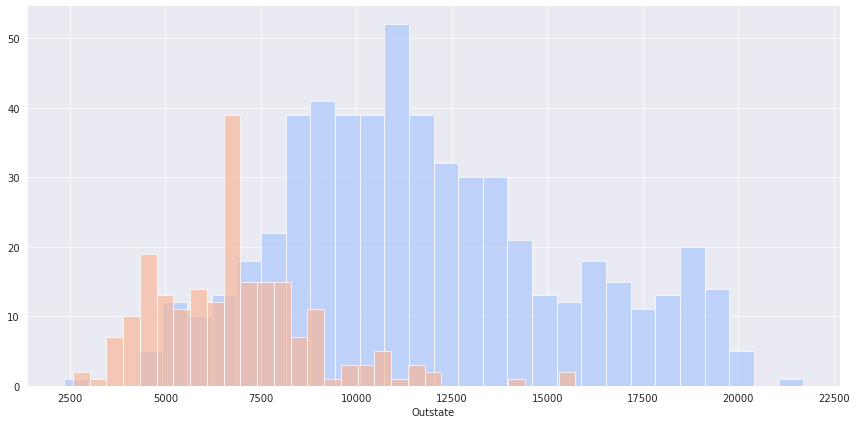

In [24]:
# Histogram showing Out-of-State Tuition based on the Private column
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=30,alpha=0.7)

In [25]:
# Interactive histogram showing Out-of-State Tuition based on the Private column

fig = px.histogram(df, x="Outstate", color="Private", nbins=45, width=850, height=400,)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



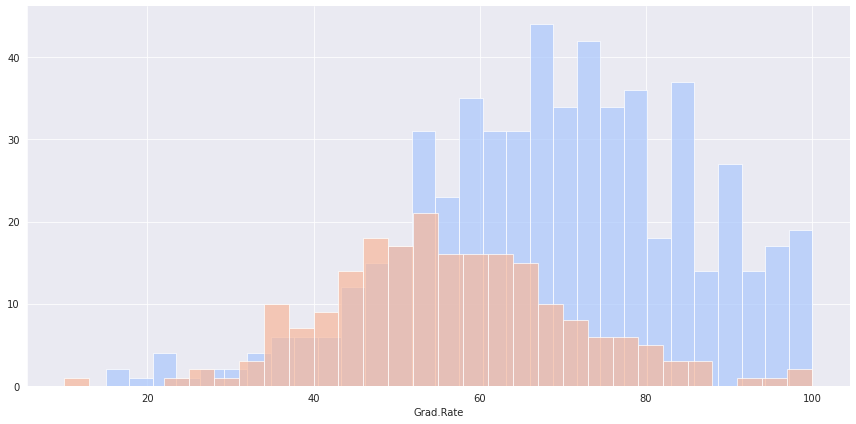

In [26]:
# Histogram for the Grad.Rate column
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=30,alpha=0.7)

In [27]:
# Histogram for the Grad.Rate column

fig = px.histogram(df, x="Grad.Rate", color="Private", nbins=45, width=850, height=400,)
fig.show()

In [28]:
df_copy = df.drop('Unnamed: 0', axis=1)

In [29]:
df_copy.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [31]:
df_copy['Private_indicator'] = df_copy['Private'].map({'Yes':1,'No':0})

In [32]:
df_copy = df_copy.drop(['Private'], axis=1)

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Apps               777 non-null    int64  
 1   Accept             777 non-null    int64  
 2   Enroll             777 non-null    int64  
 3   Top10perc          777 non-null    int64  
 4   Top25perc          777 non-null    int64  
 5   F.Undergrad        777 non-null    int64  
 6   P.Undergrad        777 non-null    int64  
 7   Outstate           777 non-null    int64  
 8   Room.Board         777 non-null    int64  
 9   Books              777 non-null    int64  
 10  Personal           777 non-null    int64  
 11  PhD                777 non-null    int64  
 12  Terminal           777 non-null    int64  
 13  S.F.Ratio          777 non-null    float64
 14  perc.alumni        777 non-null    int64  
 15  Expend             777 non-null    int64  
 16  Grad.Rate          777 non

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_copy.drop('Private_indicator',axis=1)
y = df_copy['Private_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train.shape

(543, 17)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [45]:
model = Sequential()

# input layer
model.add(Dense(17,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=64,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

Epoch 1/50
9/9 [==============================] - 0s 12ms/step - loss: 0.6253 - val_loss: 0.5939
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6108 - val_loss: 0.5751
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5992 - val_loss: 0.5548
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5822 - val_loss: 0.5354
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5714 - val_loss: 0.5169
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5520 - val_loss: 0.4971
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5279 - val_loss: 0.4777
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 0.5253 - val_loss: 0.4602
Epoch 9/50
9/9 [==============================] - 0s 12ms/step - loss: 0.5043 - val_loss: 0.4426
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 0.4847 - val_loss: 0.4258
Epoch 11/50
9/9 [============

In [ ]:
losses = pd.DataFrame(model.history.history)

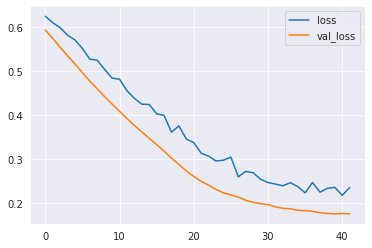

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        58
           1       0.95      0.99      0.97       176

    accuracy                           0.95       234
   macro avg       0.96      0.92      0.93       234
weighted avg       0.95      0.95      0.95       234



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 49,   9],
       [  2, 174]])